<a href="https://colab.research.google.com/github/microprediction/timemachines/blob/main/examples/notebooks/CompareToNaive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install timemachines
!pip install --upgrade statsmodels

# Example of comparing against naive forecast
For a given univariate time-series y, this runs checks against some time-series models in the timemachines library and reports any that beat the naive forecast. We proceed from models that can generate forecasts quickly to others that are more painful. First a quick plot...

In [ ]:
import numpy as np 
y = np.cumsum(np.random.randn(1000)) # <--- Swap this out for your time series 

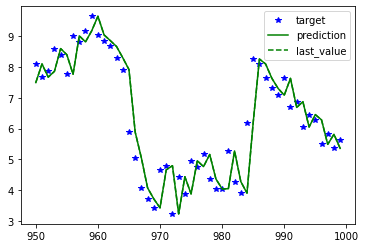

In [4]:
from timemachines.skatertools.visualization.priorplot import prior_plot
import matplotlib.pyplot as plt
from timemachines.skaters.simple.movingaverage import EMA_SKATERS

# Plot an example
f = EMA_SKATERS[0]
k = 1 
prior_plot(f=f, k=k, y=y, n=450, n_plot=50)
plt.show()

In [9]:
threshold = 0.95     # What constitutes an interesting error, relative to naive
from pprint import pprint
from timemachines.skatertools.evaluation.evaluators import evaluate_mean_squared_error
from timemachines.skaters.simple.movingaverage import empirical_last_value

def report(y,k=1,models=EMA_SKATERS,n_burn=25, threshold=0.98):
  """
       k         - how many step to foreast ahead
       threshold - fraction of naive forecast error that would constitute an interesting finding
       n_burn    - number of points to toss prior to error evaluation, to allow model to warm up
  """
  lv_err = evaluate_mean_squared_error(f=empirical_last_value, y=y, k=k, a=None, t=None, e=None, r=None, n_burn=n_burn)
  interesting = dict()
  for f in models:
      err = evaluate_mean_squared_error(f=f, y=y, k=1, a=None, t=None, e=None, r=None, n_burn=25)
      if err<threshold*lv_err:
        print(f.__name__+' error is '+str(err)+" versus "+str(lv_err)+' for naive forecast ')
        interesting[f.__name__] = err 
  return interesting

# Fast models....

In [10]:
from timemachines.skaters.simple.thinking import THINKING_SKATERS
from timemachines.skaters.simple.hypocraticensemble import HYPOCRATIC_ENSEMBLE_SKATERS
FAST_MODELS = EMA_SKATERS + THINKING_SKATERS+HYPOCRATIC_ENSEMBLE_SKATERS
report(y=y,k=k,models=EMA_SKATERS + THINKING_SKATERS+HYPOCRATIC_ENSEMBLE_SKATERS)

{}

# Slow models

In [ ]:
from timemachines.skaters.tsa.alltsaskaters import TSA_SKATERS # might also consider DLM
SLOW_MODELS = TSA_SKATERS
report(y=y,k=k,models=SLOW_MODELS)

# Interminable models
This is here really to make the point that some models are intended for one-off forecasting on a historical data set. Don't hold your breath waiting for this to run. 

In [ ]:
from timemachines.skaters.prop.prophetskaterssingular import fbprophet_univariate
from timemachines.skaters.nproph.nprophetskaters import NPROPHET_UNIVARIATE_SKATERS
INTERMINABLE_MODELS = [fbprophet_univariate] + NPROPHET_UNIVARIATE_SKATERS
report(y=y,k=k,models=INTERMINABLE_MODELS)